# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Data imputation

<br></font>
</div>

# Data imputation

<div class="alert alert-block alert-info">
<font color=black><br>

- Datasets may have missing values, and this can cause problems for many ML algorithms.
- As such, it is good practice to identify and replace missing values for each column  in your input data prior to modeling your prediction task. 
- This is called missing data imputation, or imputing for short. 
- A popular approach for data imputation is  to calculate a statistical value for each column (such as a mean) and replace all missing values for that column with the statistic.

<br></font>
</div>

# Import

In [15]:
from numpy import std
from numpy import mean
from numpy import isnan
from pandas import read_csv
from matplotlib import pyplot
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from IPython.display import Markdown, display
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 20
mpl.rcParams['figure.dpi']= 300

In [2]:
print("Loading the dataset")
dataframe = read_csv('../DATASETS/horse-colic.csv', header=None)
dataframe.head(5)

Loading the dataset


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [3]:
# Counting how many null values
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


In [4]:
# load dataset by changing each ? with a NaN
dataframe = read_csv('../DATASETS/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


# Imputer -> mean

In [5]:
print("Training the dataset with the mean instead of NaN")
# define modeling pipeline
model = RandomForestClassifier()

# use the mean instead of the NaA
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Training the dataset with the mean instead of NaN
Mean Accuracy: 0.868 (0.053)


# Comparing different imputed statistics

<div class="alert alert-block alert-info">
<font color=black><br>

- How do we know **in advance** which imputation strategy works best? It is not possible to know and we have to try them all.
- We can design an experiment to test each option (mean, median, most frequent, and constant) strategies. 
- The mean (cross-validated) accuracy of each approach can then be compared.
- **Whisker plot** which allows the distribution of results to be compared.

<br></font>
</div>

In [16]:
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

>mean 0.862 (0.054)
>median 0.870 (0.056)
>most_frequent 0.869 (0.058)
>constant 0.874 (0.055)


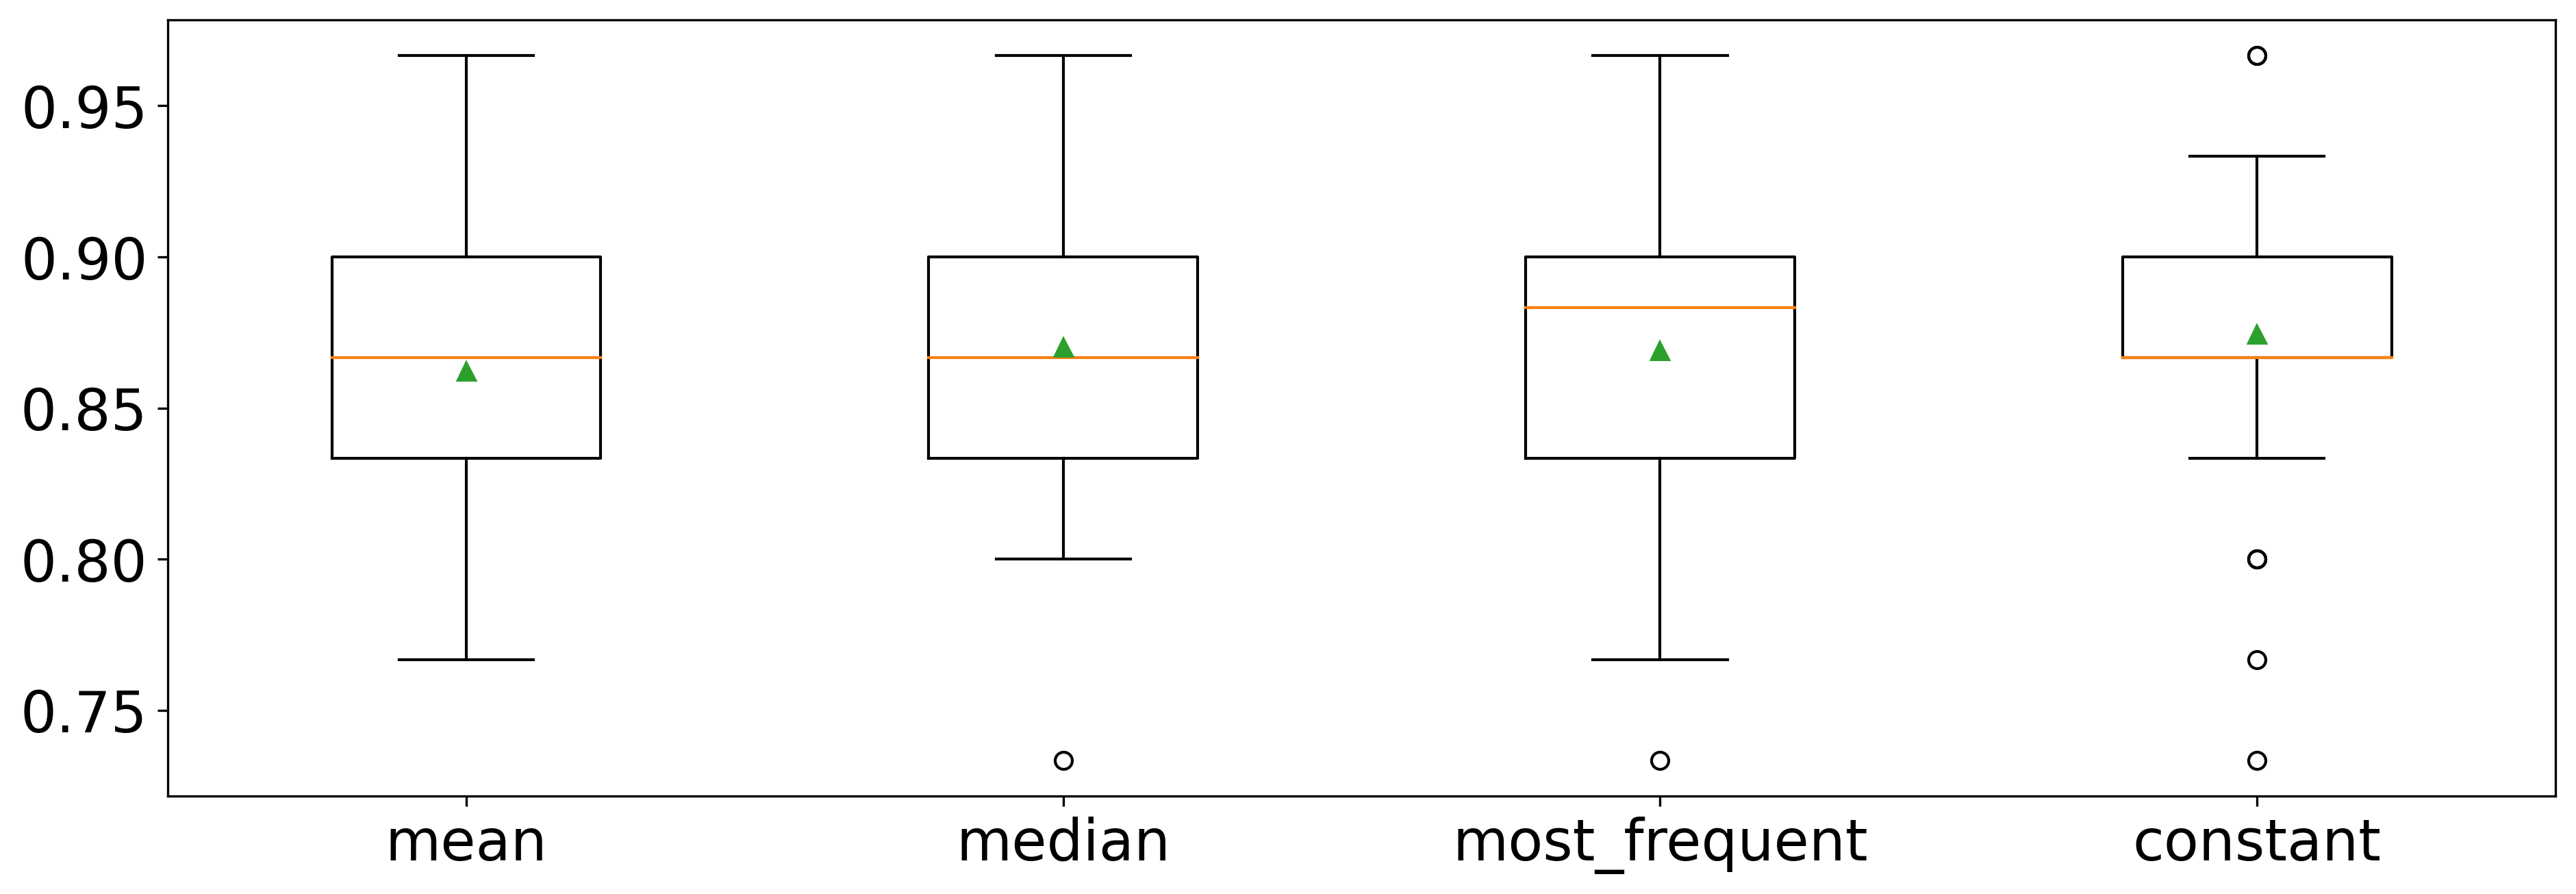

In [17]:
# Plot the results 
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

# Predict missing values

<div class="alert alert-block alert-info">
<font color=black><br>

- Another approach to data imputing is to use a model to predict the missing values. 
- One popular technique for imputation is a K-nearest neighbor model. 
- A new sample is imputed by finding the samples in the training set “closest” to it and averages these nearby points to fill in the value.
- **Only KNN (k-nearest neighbour)?** A range of different models can be used, although a simple k-nearest neighbor (KNN) model has proven to be effective in experiments.
- The result is of comparable performance against the highest scoring ones tested before.

<br></font>
</div>

In [7]:
# Summarize total missing
print('Missing from the dataset: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# Transform the dataset
Xtrans = imputer.transform(X)
# Summarize total missing (Each missing value was replaced with a value estimated by the model)
print('Missing value after we use KNN imputing: %d' % sum(isnan(Xtrans).flatten()))

Imputation via k-nearest
Missing from the dataset: 1605
Missing value after we use KNN imputing: 0


In [19]:
print("Evaluating the model after imputation via k-nearest")

# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Evaluating the model after imputation via k-nearest
Mean Accuracy: 0.868 (0.061)


# References

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/
- https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
- https://machinelearningmastery.com/handle-missing-data-python/
    
</font>
</div>